In [36]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

ej1 = pd.read_csv('dataset_1_random.csv').groupby('Nodos').mean()
ej3 = pd.read_csv('OUT_ej3.csv')
ej3['Nodos'] = ej3['cant_gim']+ej3['cant_poke']
# ej3 = ej3.groupby('opcion_busqueda').mean()
ej3_pk = ej3[ej3.opcion_busqueda == 0]
ej3_gm = ej3[ej3.opcion_busqueda == 1]

ej3_pk.groupby('Nodos').mean()
ej3_gm.groupby('Nodos').mean()

# ej2 = pd.read_csv('dataset_2_random_rt.csv').groupby('Nodos').mean()


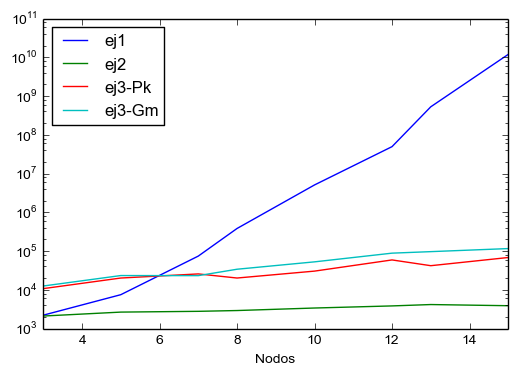

In [33]:
ej1['Tiempo'].plot(logy=True, label='ej1')
ej2['Tiempo'].plot(logy=True, label='ej2')
ej3_pk.groupby('Nodos').mean()['tiempo_busqueda'].plot(logy=True, label='ej3-Pk')
ej3_gm.groupby('Nodos').mean()['tiempo_busqueda'].plot(logy=True, label='ej3-Gm')
plt.legend(loc='best')

In [ ]:
ej3g = pd.read_csv('OUT_ej3_grande.csv')
ej3g['Nodos'] = ej3g['cant_gim'] + ej3g['cant_poke']
ej3g_pk = ej3g[ej3g.opcion_busqueda == 0]
ej3g_gm = ej3g[ej3g.opcion_busqueda == 1]

ej2g = pd.read_csv('dataset_2_random_rt.csv')
ej2g = ej2g.groupby('Nodos').mean()
ej2g = ej2g[ej2g.Gimnasios < 100]
ej2g['Tiempo'].plot(logy=True)

ej3g_pk.groupby('Nodos').mean()['tiempo_busqueda'].plot(logy=True, color='g')
ej3g_gm.groupby('Nodos').mean()['tiempo_busqueda'].plot(logy=True, color='r', linesize=4)